# An exploration of song lyrics through topic modeling




#### First, download the data we use for this demo:


1.   A dataset for fitting BERTopic
2.   4 csv files corresponding to playlists (for analysis)



In [ ]:
#@title 
!gdown --id 1kLFtaCYJbSqyvzJKp9y1_YUAU0MhQ7K6

In [ ]:
#@title
!gdown --id 1FIDxukfkyFYj3dW7ktp1WXQSRh2KwiuZ 
!gdown --id 1vWPGrto3s4OI1_7mc-OLCZJGLI-6qI1P 
!gdown --id 1QaKoVSv8fQsjtfzZD1AyzaZKHEWh44tK 
!gdown --id 18J-7Kgwzg11CACZPPoEyiUERjNs9u48_

#### Install and import the libraries needed.

In [ ]:
!pip install bertopic

In [ ]:
!pip install -U sentence-transformers

In [5]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib.dates as plt_dates
import collections
import statistics
from collections import Counter, defaultdict
%matplotlib inline
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

#### Load the dataset

In [6]:
df = pd.read_csv('tcc_ceds_music.csv')
lyrics = df['lyrics']
lyrics = list(lyrics)

In [7]:
df[['track_name', 'lyrics', 'genre', 'release_date']].head()

,track_name,lyrics,genre,release_date
0,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,pop,1950
1,i believe,believe drop rain fall grow believe darkest ni...,pop,1950
2,cry,sweetheart send letter goodbye secret feel bet...,pop,1950
3,patricia,kiss lips want stroll charm mambo chacha merin...,pop,1950
4,apopse eida oneiro,till darling till matter know till dream live ...,pop,1950


### Create a BERTopic model and fit in on our dataset.

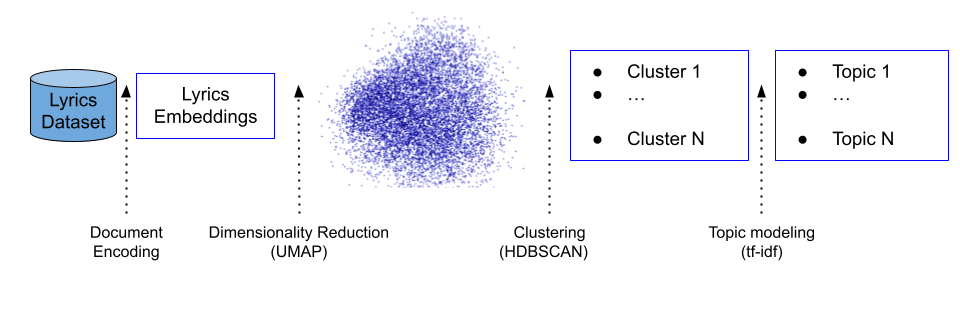

In [ ]:
sentence_transformer = SentenceTransformer('all-MiniLM-L6-v2')

topic_model = BERTopic(language='english', embedding_model=sentence_transformer, calculate_probabilities=True, verbose=True)

In [9]:
topics, probs = topic_model.fit_transform(lyrics)

Batches:   0%|          | 0/887 [00:00<?, ?it/s]

2022-04-07 14:10:35,762 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-07 14:11:29,530 - BERTopic - Reduced dimensionality with UMAP
2022-04-07 14:12:26,161 - BERTopic - Clustered UMAP embeddings with HDBSCAN


### Let's explore the topics we created!

In [10]:
topic_model.visualize_topics()

In [43]:
topic_model.get_topic(0)

[('heart', 0.0320356452755244),
 ('hurt', 0.029443084029010837),
 ('break', 0.017967288972689174),
 ('cry', 0.01672124363330239),
 ('tear', 0.016567157124778957),
 ('hearts', 0.01291988044539828),
 ('apart', 0.011333582179435895),
 ('pain', 0.009855082057406346),
 ('baby', 0.008331054448938717),
 ('fall', 0.007919484048079531)]

In [36]:
topic_model.visualize_barchart(top_n_topics=20)

## Evaluation Metrics

### 1. Topic Coherence

For topic $t = \{w_1, \cdots, w_n\}$, let the $V = \{ v_1, \cdots, v_n\}$ the Word2Vec vectors associated with each word.

$TC (t) =  \frac{\sum_{i, j} \cos(v_i, v_j)}{n^2} $


###2. Topic Diversity

For topics $t_1 = \{w^{(1)}_1, \cdots, w^{(1)}_n\}$ and $t_2 = \{w^{(2)}_1, \cdots, w^{(2)}_m$, let $V_1 = \{ v^{(1)}_1, \cdots, v^{(1)}_n\}$ $V_2 = \{ v^{(2)}_1, \cdots, v^{(2)}_m\}$ the sets of Word2Vec vectors.

$TD(t_1, t_2) = 1 - \frac{\sum_{i = 1}^{n} \sum_{j=1}^{m} \cos(v^{(1)}_i, v^{(2)}_j)}{nm} $

## Lyrics study through topics

Let's hide the sensitive topics.

In [22]:
sensitive_topics = [3, 4]

In [23]:
genres = df['genre'] # tcc
lyrics = df['lyrics'] # tcc
year = df['release_date'] # tcc

topics_per_genre = defaultdict(list)

topics_per_year = defaultdict(list)

for idx, i in enumerate(year):
    topics_per_year[(int(i) // 10) * 10].append(topics[idx])
    
for idx, i in enumerate(genres):
    topics_per_genre[i].append(topics[idx])

### 1. Most common topics per genre (Pop, Country, Blues, Jazz, Raggae, Rock, Hip Hop)

In [24]:
for key in topics_per_genre:
    print("For the {} genre the most popular topics are:".format(key))
    #print("For the {}s the most popular topics are:".format(key))
    i = 0
    counter = Counter(topics_per_genre[key])
    for key2 in counter:
        if key2 in sensitive_topics:
          print("[Sensitive language: topic was hidden]")
        else:
          print(np.array(topic_model.get_topic(key2), dtype=object)[:, 0][:3])
        if i > 6:
            break
        i += 1
    print(" ")


For the pop genre the most popular topics are:
['heart' 'hurt' 'break']
['believe' 'babababoo' 'everyday']
['like' 'know' 'come']
['moonglow' 'kentucky' 'moon']
['sky' 'blue' 'bluebirds']
['miss' 'america' 'substitute']
['breathe' 'breath' 'greatest']
['feel' 'feelin' 'good']
 
For the country genre the most popular topics are:
['like' 'know' 'come']
['dream' 'linger' 'sunbeams']
['veil' 'wail' 'visit']
['blue' 'indigo' 'mood']
['fool' 'pity' 'fall']
['accustom' 'hair' 'grow']
['sing' 'song' 'songs']
['today' 'tomorrow' 'yesterday']
 
For the blues genre the most popular topics are:
['like' 'know' 'come']
['fool' 'pity' 'fall']
['belong' 'planet' 'prisoner']
['cold' 'freeze' 'coldblooded']
['memory' 'forget' 'remember']
['today' 'tomorrow' 'yesterday']
['heart' 'hurt' 'break']
['promise' 'oheh' 'unconditionally']
 
For the jazz genre the most popular topics are:
['like' 'know' 'come']
['zinga' 'rhyme' 'creator']
['wish' 'thinkin' 'closer']
['feel' 'feelin' 'good']
['long' 'appear' 'dan

### 2. Most common topics every decade

In [25]:
for key in topics_per_year:
    #print("For the {} genre the most popular topics are:".format(key))
    print("For the {}s the most popular topics are:".format(key))
    i = 0
    counter = Counter(topics_per_year[key])
    for key2 in counter:
        if key2 in sensitive_topics:
          print("[Sensitive language: topic was hidden]")
        else:
          print(np.array(topic_model.get_topic(key2), dtype=object)[:, 0][:3])
        if i > 6:
            break
        i += 1
    print(" ")


For the 1950s the most popular topics are:
['heart' 'hurt' 'break']
['believe' 'babababoo' 'everyday']
['like' 'know' 'come']
['moonglow' 'kentucky' 'moon']
['sky' 'blue' 'bluebirds']
['miss' 'america' 'substitute']
['breathe' 'breath' 'greatest']
['feel' 'feelin' 'good']
 
For the 1960s the most popular topics are:
['cheat' 'cheatin' 'toss']
['like' 'know' 'come']
['christmas' 'santa' 'jingle']
['tonight' 'baby' 'night']
['dream' 'yeahyeah' 'lover']
['autumn' 'winter' 'precious']
['heart' 'hurt' 'break']
['dream' 'linger' 'sunbeams']
 
For the 1970s the most popular topics are:
['tonight' 'baby' 'night']
['like' 'know' 'come']
['tire' 'walkin' 'hangover']
['locomotive' 'driver' 'dog']
['mirror' 'snowblind' 'reflect']
['walk' 'away' 'walkin']
['sail' 'ship' 'againhome']
['moment' 'quando' 'moments']
 
For the 1980s the most popular topics are:
['like' 'know' 'come']
['summer' 'summertime' 'cruel']
['soldier' 'fight' 'battle']
['heart' 'hurt' 'break']
['death' 'blood' 'human']
['memory'

### 3. Topics within user-generated playlists

In [26]:
def describe_playlist(path_to_playlist):
  df = pd.read_csv(path_to_playlist)
  name = df['name'][1]
  print(name)
  lyrics = list(df['lyrics'])
  topics, _ = topic_model.transform(lyrics)
  print("Name of playlist: {}\n".format(name))
  real_topics = [t for t in topics if t != -1]

  counter = Counter(real_topics)
  for key in counter:
    print("Number of times topic {} appears: {}".format(key, counter[key]))
    if key in sensitive_topics:
      print("[Sensitive language: topic was hidden]")
    else:
      topic_words = np.array(topic_model.topics[key], dtype=object)[..., 0]
      print(topic_words)

In [39]:
describe_playlist("playlist-52.csv")

Christmas


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-04-07 14:56:25,276 - BERTopic - Reduced dimensionality with UMAP
2022-04-07 14:56:25,281 - BERTopic - Predicted clusters with HDBSCAN
2022-04-07 14:56:25,334 - BERTopic - Calculated probabilities with HDBSCAN


Name of playlist: Christmas

Number of times topic 19 appears: 8
['christmas' 'santa' 'jingle' 'bell' 'carol' 'year' 'snow' 'mistletoe'
 'holiday' 'delegation']
Number of times topic 103 appears: 1
['wonderland' 'sleigh' 'winter' 'snowman' 'luie' 'weather' 'ringalinga'
 'dingdongding' 'lovely' 'snow']
Number of times topic 57 appears: 1
['winter' 'snow' 'simmer' 'lollipop' 'warm' 'marshmallow' 'lolli'
 'snowball' 'dreamin' 'weather']


In [28]:
describe_playlist("playlist-65.csv")

PlayStation


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2022-04-07 14:15:52,391 - BERTopic - Reduced dimensionality with UMAP
2022-04-07 14:15:52,419 - BERTopic - Predicted clusters with HDBSCAN
2022-04-07 14:15:52,676 - BERTopic - Calculated probabilities with HDBSCAN


Name of playlist: PlayStation

Number of times topic 74 appears: 2
['feat' 'remix' 'weeknd' 'kanye' 'prod' 'majid' 'award' 'khaled'
 'partynextdoor' 'riddim']
Number of times topic 176 appears: 1
['word' 'worship' 'jupiter' 'mar' 'spring' 'moon' 'song' 'star' 'sing'
 'evermore']
Number of times topic 31 appears: 1
['goodbye' 'farewell' 'babe' 'goodbyes' 'long' 'leave' 'trav' 'welcome'
 'yesterday' 'strange']
Number of times topic 101 appears: 1
['sky' 'blue' 'bluebirds' 'theme' 'days' 'symphonic' 'bright' 'notice'
 'shin' 'smile']
Number of times topic 6 appears: 1
['feel' 'feelin' 'good' 'goody' 'witch' 'vibe' 'real' 'like' 'pain'
 'everyday']
Number of times topic 13 appears: 1
['jazz' 'play' 'guitar' 'music' 'band' 'country' 'hound' 'songs' 'rhythm'
 'boogie']
Number of times topic 12 appears: 1
['today' 'tomorrow' 'yesterday' 'future' 'somebody' 'sake' 'sorrow'
 'yesterdays' 'pigmeat' 'days']
Number of times topic 10 appears: 1
['memory' 'forget' 'remember' 'memories' 'dynamo' 'sou

In [29]:
describe_playlist("playlist-72.csv")

spanish jams


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2022-04-07 14:15:57,317 - BERTopic - Reduced dimensionality with UMAP
2022-04-07 14:15:57,356 - BERTopic - Predicted clusters with HDBSCAN
2022-04-07 14:15:57,705 - BERTopic - Calculated probabilities with HDBSCAN


Name of playlist: spanish jams

Number of times topic 4 appears: 1
[Sensitive language: topic was hidden]
Number of times topic 75 appears: 1
['darling' 'carry' 'shoo' 'sweetheart' 'stay' 'pretty' 'replace' 'dear'
 'amour' 'lover']


In [30]:
describe_playlist("playlist-84.csv")

Workout2


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-04-07 14:16:01,178 - BERTopic - Reduced dimensionality with UMAP
2022-04-07 14:16:01,189 - BERTopic - Predicted clusters with HDBSCAN
2022-04-07 14:16:01,308 - BERTopic - Calculated probabilities with HDBSCAN


Name of playlist: Workout2

Number of times topic 4 appears: 5
[Sensitive language: topic was hidden]
